In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [31]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
pd.set_option('display.max_columns', 25)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LassoCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.api import OLS

import seaborn as sns
sns.set()

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import time

In [4]:
df = pd.read_csv('Songs/songs0.csv')

# remove "spotify:track:", "spotify:artist:", and "spotify:album:" from uri
df["track_uri"] = df["track_uri"].str[14:]
df["artist_uri"] = df["artist_uri"].str[15:]
df["album_uri"] = df["album_uri"].str[14:]

In [5]:
df

,pid,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name
0,0,0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook
1,0,1,Britney Spears,6I9VzXrHxO9rA9A5euc8Ak,26dSoYclwsYLMAKD3tpOr4,Toxic,0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone
2,0,2,Beyoncé,0WqIKmW4BTrj3eJFmnCKMv,6vWDO969PvNqNYHIOW5v0m,Crazy In Love,25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit)
3,0,3,Justin Timberlake,1AWQoqb9bSvzTjaLralEkT,31TPClRtHm23RisEBtV3X7,Rock Your Body,6QPkyl04rXwTGlGlcYaRoW,267266,Justified
4,0,4,Shaggy,1lzr43nnXAijIGYnCT8M8H,5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot
5,0,5,Usher,0XUfyU2QviPAs6bxSpXYG4,23zg3TcAtWQy7J6upgbUnj,Yeah!,0vO0b1AvY49CPQyVisJLj0,250373,Confessions
6,0,6,Usher,68vgtRHr7iZHpzGpon6Jlo,23zg3TcAtWQy7J6upgbUnj,My Boo,1RM6MGv6bcl6NrAG8PGoZk,223440,Confessions
7,0,7,The Pussycat Dolls,3BxWKCI06eQ5Od8TY2JBeA,6wPhSqRtPu1UhRCDX5yaDJ,Buttons,5x8e8UcCeOgrOzSnDGuPye,225560,PCD
8,0,8,Destiny's Child,7H6ev70Weq6DdpZyyTmUXk,1Y8cdNmUJH7yBTd9yOvr5i,Say My Name,283NWqNsCA9GwVHrJk59CG,271333,The Writing's On The Wall
9,0,9,OutKast,2PpruBYCo4H7WOBJ7Q2EwM,1G9G7WwrXka3Z1r7aIDjI7,Hey Ya! - Radio Mix / Club Mix,1UsmQ3bpJTyK6ygoOOjG1r,235213,Speakerboxxx/The Love Below


In [6]:
# https://stackoverflow.com/questions/30557409/spotify-api-post-call-response-415
client_id = "9cd3dd2ea2cf492ca28ab0247a79d781"
client_secret = "11c972ad002843e9be5ecc31f022dd6e"
grant_type = 'client_credentials'
body_params = {'grant_type' : grant_type}
url = 'https://accounts.spotify.com/api/token'

response = requests.post(url, data=body_params, auth = (client_id, client_secret)) 
print(response.content)

b'{"access_token":"BQA3LRzVgETxx93KPzOmOZajKUVG_UcfWkR06Hr3eE0DCw40sIAyl-QkBvb8e8YzpNXjM-qD0aziT4YTPfA","token_type":"Bearer","expires_in":3600,"scope":""}'


In [7]:
# Using Spotipy library
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

sp.audio_features(["0UaMYEvWZi0ZqiDOoHU3YI"])

[{'acousticness': 0.0311,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0UaMYEvWZi0ZqiDOoHU3YI',
  'danceability': 0.904,
  'duration_ms': 226864,
  'energy': 0.813,
  'id': '0UaMYEvWZi0ZqiDOoHU3YI',
  'instrumentalness': 0.00697,
  'key': 4,
  'liveness': 0.0471,
  'loudness': -7.105,
  'mode': 0,
  'speechiness': 0.121,
  'tempo': 125.461,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/0UaMYEvWZi0ZqiDOoHU3YI',
  'type': 'audio_features',
  'uri': 'spotify:track:0UaMYEvWZi0ZqiDOoHU3YI',
  'valence': 0.81}]

In [10]:
def songs_in_playlist(df, pid):
    '''
    input: dataframe and playlist ID
    returns: list of all songs on playlist by track_uri 
    '''
    playlist = np.where(df.pid == pid)
    return list(df.iloc[playlist]["track_uri"])

def playlist_means(tracks):
    '''
    input: list of tracks on a playlist (can be generated from songs_in_playlist())
    returns: statistics for audio features of playlist  
    '''
    num = len(tracks)
    # We can only pass 100 tracks at a time
    if num <= 100:
        p = pd.DataFrame.from_records(sp.audio_features(tracks))
    else:
        start = 0
        end = 100
        p = pd.DataFrame.from_records(sp.audio_features(tracks[start:end]))
        for i in range(int(num / 100)):
            start += end
            diff = num - end
            if diff > 100:
                end += 100
            else:
                end += diff
            
            new_p = pd.DataFrame.from_records(sp.audio_features(tracks[start:end]))
            p = p.append(new_p) 
    return p

In [11]:
tracks = songs_in_playlist(df, 20)
playlist_means(tracks)

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.027000,https://api.spotify.com/v1/audio-analysis/1iDP...,0.914,125217,0.415,1iDPB2WNsGEWuKycQyDGn6,0.000000,1,0.1140,-7.219,1,0.3220,137.974,4,https://api.spotify.com/v1/tracks/1iDPB2WNsGEW...,audio_features,spotify:track:1iDPB2WNsGEWuKycQyDGn6,0.4960
1,0.000404,https://api.spotify.com/v1/audio-analysis/0AIC...,0.659,143969,0.614,0AICBlLzFCTpUqmAbtzB2z,0.000000,9,0.1230,-7.320,0,0.0541,119.405,4,https://api.spotify.com/v1/tracks/0AICBlLzFCTp...,audio_features,spotify:track:0AICBlLzFCTpUqmAbtzB2z,0.2600
2,0.003650,https://api.spotify.com/v1/audio-analysis/1c5L...,0.934,192000,0.407,1c5Lbn9mYwNYbnNiizw6D0,0.000000,0,0.1100,-8.058,1,0.3450,140.024,4,https://api.spotify.com/v1/tracks/1c5Lbn9mYwNY...,audio_features,spotify:track:1c5Lbn9mYwNYbnNiizw6D0,0.0793
3,0.363000,https://api.spotify.com/v1/audio-analysis/4s2B...,0.708,182267,0.612,4s2BWgnSQ9NZiOQM4PP4HB,0.000000,6,0.2040,-8.939,0,0.3020,94.274,4,https://api.spotify.com/v1/tracks/4s2BWgnSQ9NZ...,audio_features,spotify:track:4s2BWgnSQ9NZiOQM4PP4HB,0.3410
4,0.002640,https://api.spotify.com/v1/audio-analysis/7GX5...,0.732,182707,0.750,7GX5flRQZVHRAGd6B4TmDO,0.000000,11,0.1090,-6.366,0,0.2310,155.096,4,https://api.spotify.com/v1/tracks/7GX5flRQZVHR...,audio_features,spotify:track:7GX5flRQZVHRAGd6B4TmDO,0.4010
5,0.057900,https://api.spotify.com/v1/audio-analysis/3uFm...,0.917,122996,0.624,3uFmweGlFudKNiX13XFwFm,0.000000,4,0.0714,-6.728,1,0.1470,124.984,4,https://api.spotify.com/v1/tracks/3uFmweGlFudK...,audio_features,spotify:track:3uFmweGlFudKNiX13XFwFm,0.3430
6,0.015900,https://api.spotify.com/v1/audio-analysis/0Fcz...,0.955,115316,0.773,0FczZscGB1PynHk6zwNO69,0.000172,1,0.0809,-3.062,1,0.2830,135.039,4,https://api.spotify.com/v1/tracks/0FczZscGB1Py...,audio_features,spotify:track:0FczZscGB1PynHk6zwNO69,0.2380
7,0.066700,https://api.spotify.com/v1/audio-analysis/4Cb4...,0.821,191990,0.713,4Cb4Ehfj2S8UhC5JKqmJ6m,0.000000,0,0.0923,-4.814,0,0.2430,160.988,4,https://api.spotify.com/v1/tracks/4Cb4Ehfj2S8U...,audio_features,spotify:track:4Cb4Ehfj2S8UhC5JKqmJ6m,0.6140
8,0.140000,https://api.spotify.com/v1/audio-analysis/7zez...,0.939,145171,0.617,7zez4ZwqfSqD6fPQgcnqwu,0.000000,7,0.1120,-5.933,0,0.2980,131.949,4,https://api.spotify.com/v1/tracks/7zez4ZwqfSqD...,audio_features,spotify:track:7zez4ZwqfSqD6fPQgcnqwu,0.6800
9,0.006130,https://api.spotify.com/v1/audio-analysis/7MCs...,0.691,201721,0.715,7MCs283jdifycrZoMPPynX,0.000000,8,0.0368,-7.215,1,0.0589,77.223,4,https://api.spotify.com/v1/tracks/7MCs283jdify...,audio_features,spotify:track:7MCs283jdifycrZoMPPynX,0.4650


---
**Note**

We could construct a model which determines if a user will like a certain playlist based on comparing their playlists and liked playlists to the audio features of our playlist. Train model on users playlists and likes, classify playlist as 0 or 1 if the user will like the playlist.

I believe our final model will look something like this: https://developer.spotify.com/console/get-recommendations/

In [47]:
songs = pd.DataFrame()
ranges1 = np.arange(0,1001, 1)
for n in ranges1:
    songs = songs.append(playlist_means(songs_in_playlist(df, n)))
    time.sleep(1)

KeyboardInterrupt: 

In [43]:
ranges = np.arange(20,30, 1)
ranges

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

(array([  5.,   8.,  28.,  60.,  77.,  92., 109.,  86.,  39.,  10.]),
 array([0.0849 , 0.17421, 0.26352, 0.35283, 0.44214, 0.53145, 0.62076,
        0.71007, 0.79938, 0.88869, 0.978  ]),
 <a list of 10 Patch objects>)

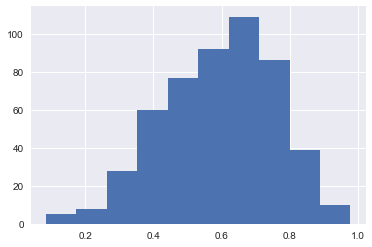

In [24]:
plt.hist(songs['danceability'])

(array([ 11.,  74., 265., 110.,  37.,   7.,   4.,   3.,   1.,   2.]),
 array([ 65306. , 124674.1, 184042.2, 243410.3, 302778.4, 362146.5,
        421514.6, 480882.7, 540250.8, 599618.9, 658987. ]),
 <a list of 10 Patch objects>)

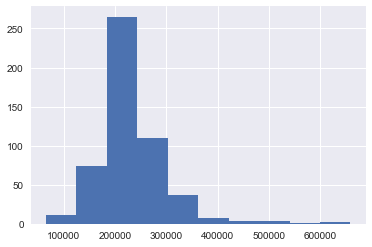

In [18]:
plt.hist(songs['duration_ms'])

(array([  5.,   8.,  16.,  26.,  54.,  50.,  80.,  97., 106.,  72.]),
 array([0.0134 , 0.11066, 0.20792, 0.30518, 0.40244, 0.4997 , 0.59696,
        0.69422, 0.79148, 0.88874, 0.986  ]),
 <a list of 10 Patch objects>)

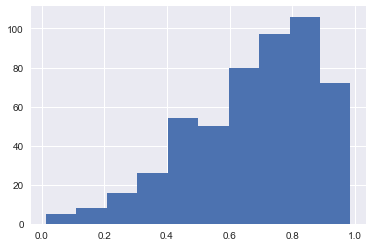

In [19]:
plt.hist(songs['energy'])

(array([  5.,   8.,  28.,  60.,  77.,  92., 109.,  86.,  39.,  10.]),
 array([0.0849 , 0.17421, 0.26352, 0.35283, 0.44214, 0.53145, 0.62076,
        0.71007, 0.79938, 0.88869, 0.978  ]),
 <a list of 10 Patch objects>)

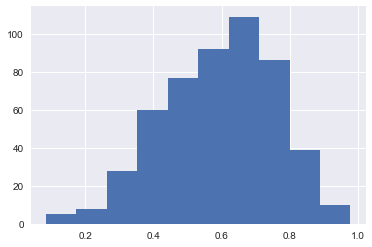

In [17]:
plt.hist(songs['danceability'])

(array([  5.,   8.,  28.,  60.,  77.,  92., 109.,  86.,  39.,  10.]),
 array([0.0849 , 0.17421, 0.26352, 0.35283, 0.44214, 0.53145, 0.62076,
        0.71007, 0.79938, 0.88869, 0.978  ]),
 <a list of 10 Patch objects>)

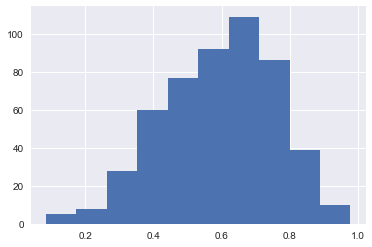

In [17]:
plt.hist(songs['danceability'])